In [10]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Excercise 1 -  Generated Quantities Block

In [15]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


In [5]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

14:52:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:52:39 - cmdstanpy - INFO - CmdStan done processing.


In [7]:
samples_df = samples.draws_pd()

In [8]:
samples_df.head()

,chain__,iter__,draw__,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9],y_sim[10]
0,1.0,1.0,1.0,0.0,0.0,118.9200,106.0,119.0,117.0,118.0,129.0,110.0,97.0,125.0,100.0,100.0
1,1.0,2.0,2.0,0.0,0.0,143.5270,156.0,143.0,142.0,146.0,135.0,143.0,127.0,168.0,124.0,113.0
2,1.0,3.0,3.0,0.0,0.0,253.4130,255.0,268.0,223.0,239.0,219.0,272.0,250.0,232.0,265.0,226.0
3,1.0,4.0,4.0,0.0,0.0,45.6368,41.0,46.0,60.0,50.0,41.0,48.0,41.0,45.0,51.0,56.0
4,1.0,5.0,5.0,0.0,0.0,323.9890,354.0,284.0,290.0,330.0,320.0,323.0,329.0,334.0,322.0,346.0


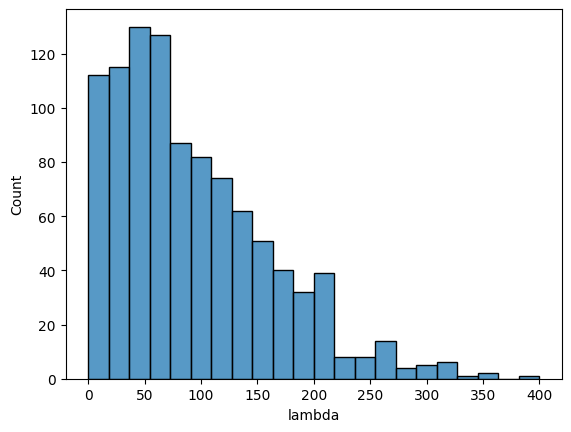

In [11]:
sns.histplot(data=samples_df, x="lambda")
plt.show()

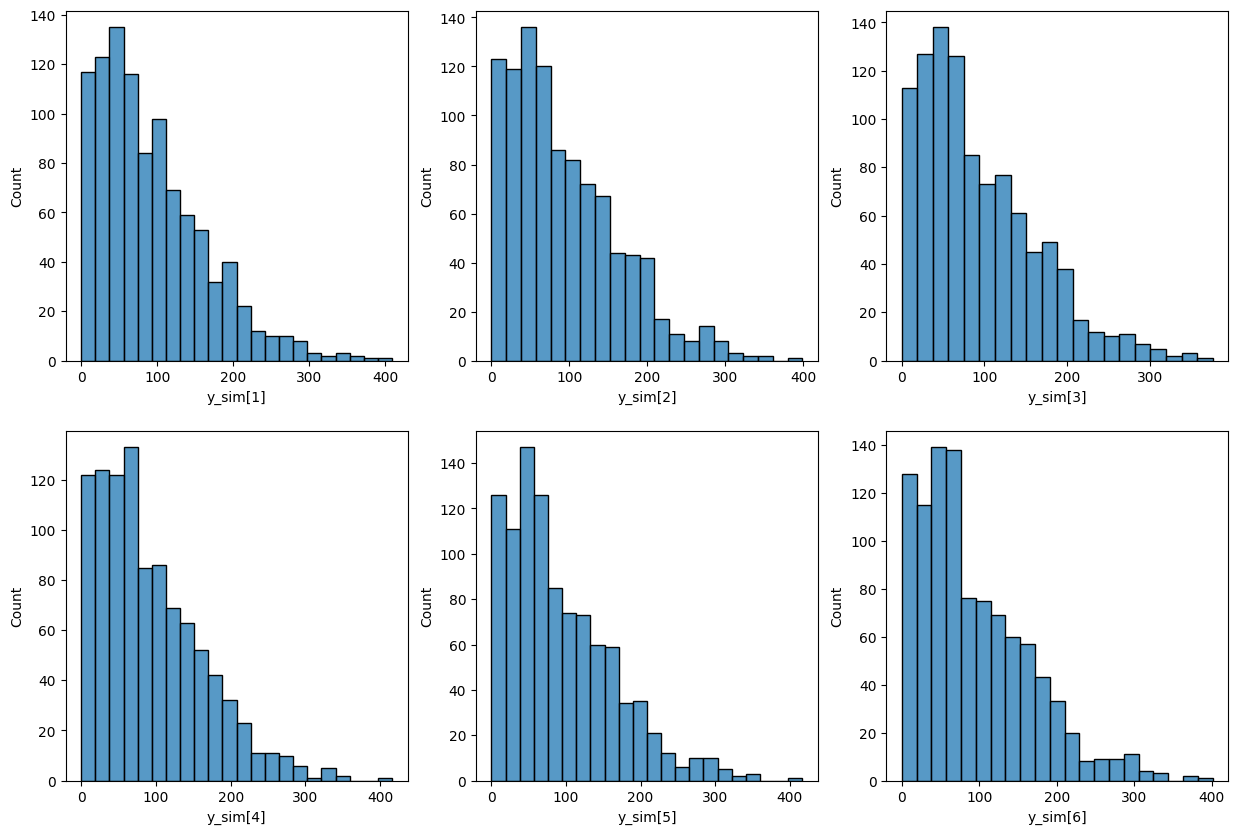

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))

sns.histplot(data=samples_df, x="y_sim[1]", ax=axs[0, 0])
sns.histplot(data=samples_df, x="y_sim[2]", ax=axs[0, 1])
sns.histplot(data=samples_df, x="y_sim[3]", ax=axs[0, 2])
sns.histplot(data=samples_df, x="y_sim[4]", ax=axs[1, 0])
sns.histplot(data=samples_df, x="y_sim[5]", ax=axs[1, 1])
sns.histplot(data=samples_df, x="y_sim[6]", ax=axs[1, 2])

plt.show()

## Excercise 2 - Constraints on the data 

In [ ]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

15:02:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:02:31 - cmdstanpy - INFO - CmdStan done processing.


In [21]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

15:03:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:03:55 - cmdstanpy - INFO - CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [23]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


15:08:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:08:12 - cmdstanpy - INFO - CmdStan done processing.
15:08:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is -1.02689, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -1.78608, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.470662, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.159341, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.946698, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.583674, but must be positive finite! (in 'code_4.stan', line 6, column 4 to column 30)
	Exception: gamma_lpdf: Random variable is -0.0157175, but must be positive finite! 

"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8442 of 6000 (140.70%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

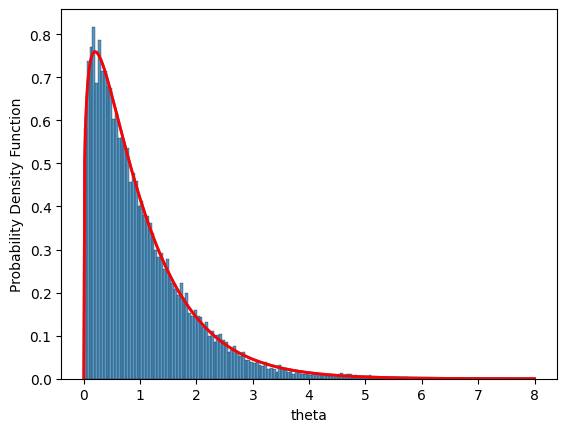

In [24]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
samples_df = out_gamma1.draws_pd()
sns.histplot(samples_df, x="theta", bins=160, stat="density", label="Actual")
plt.plot(xs, pdfs, linewidth=2, label="Analytical", color='r')

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [25]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

15:15:26 - cmdstanpy - INFO - compiling stan file /workspace/code_5.stan to exe file /workspace/code_5
15:15:37 - cmdstanpy - INFO - compiled model executable: /workspace/code_5
15:15:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:15:38 - cmdstanpy - INFO - CmdStan done processing.
15:15:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code_5.stan', line 6, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!
15:15:38 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 6000 (0.03%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

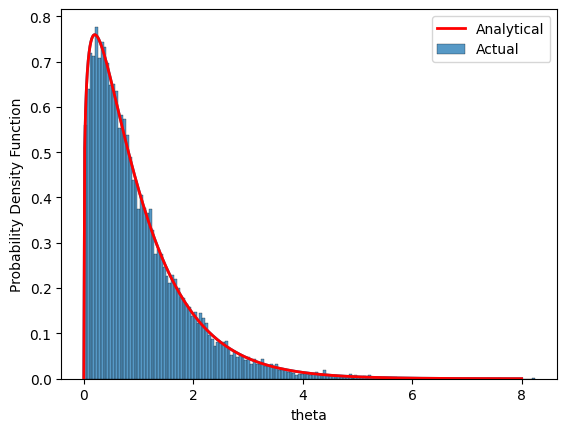

In [27]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
samples_df = out_gamma2.draws_pd()
sns.histplot(samples_df, x="theta", bins=160, stat="density", label="Actual")
plt.plot(xs, pdfs, linewidth=2, label="Analytical", color='r')


plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.legend()
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [32]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6
L = 5
y0 = 2

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=1, chains = 1)

16:01:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

16:01:06 - cmdstanpy - INFO - CmdStan done processing.


In [33]:
found_sigma = tunes.draws_pd()["sigma"][0]
print("Found sigma: ", found_sigma)

Found sigma:  8.34803


## Excercise 5 - different methods of defining models


In [35]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 8022000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

16:06:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:06:36 - cmdstanpy - INFO - CmdStan done processing.
16:06:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:06:36 - cmdstanpy - INFO - CmdStan done processing.


16:06:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:06:36 - cmdstanpy - INFO - CmdStan done processing.


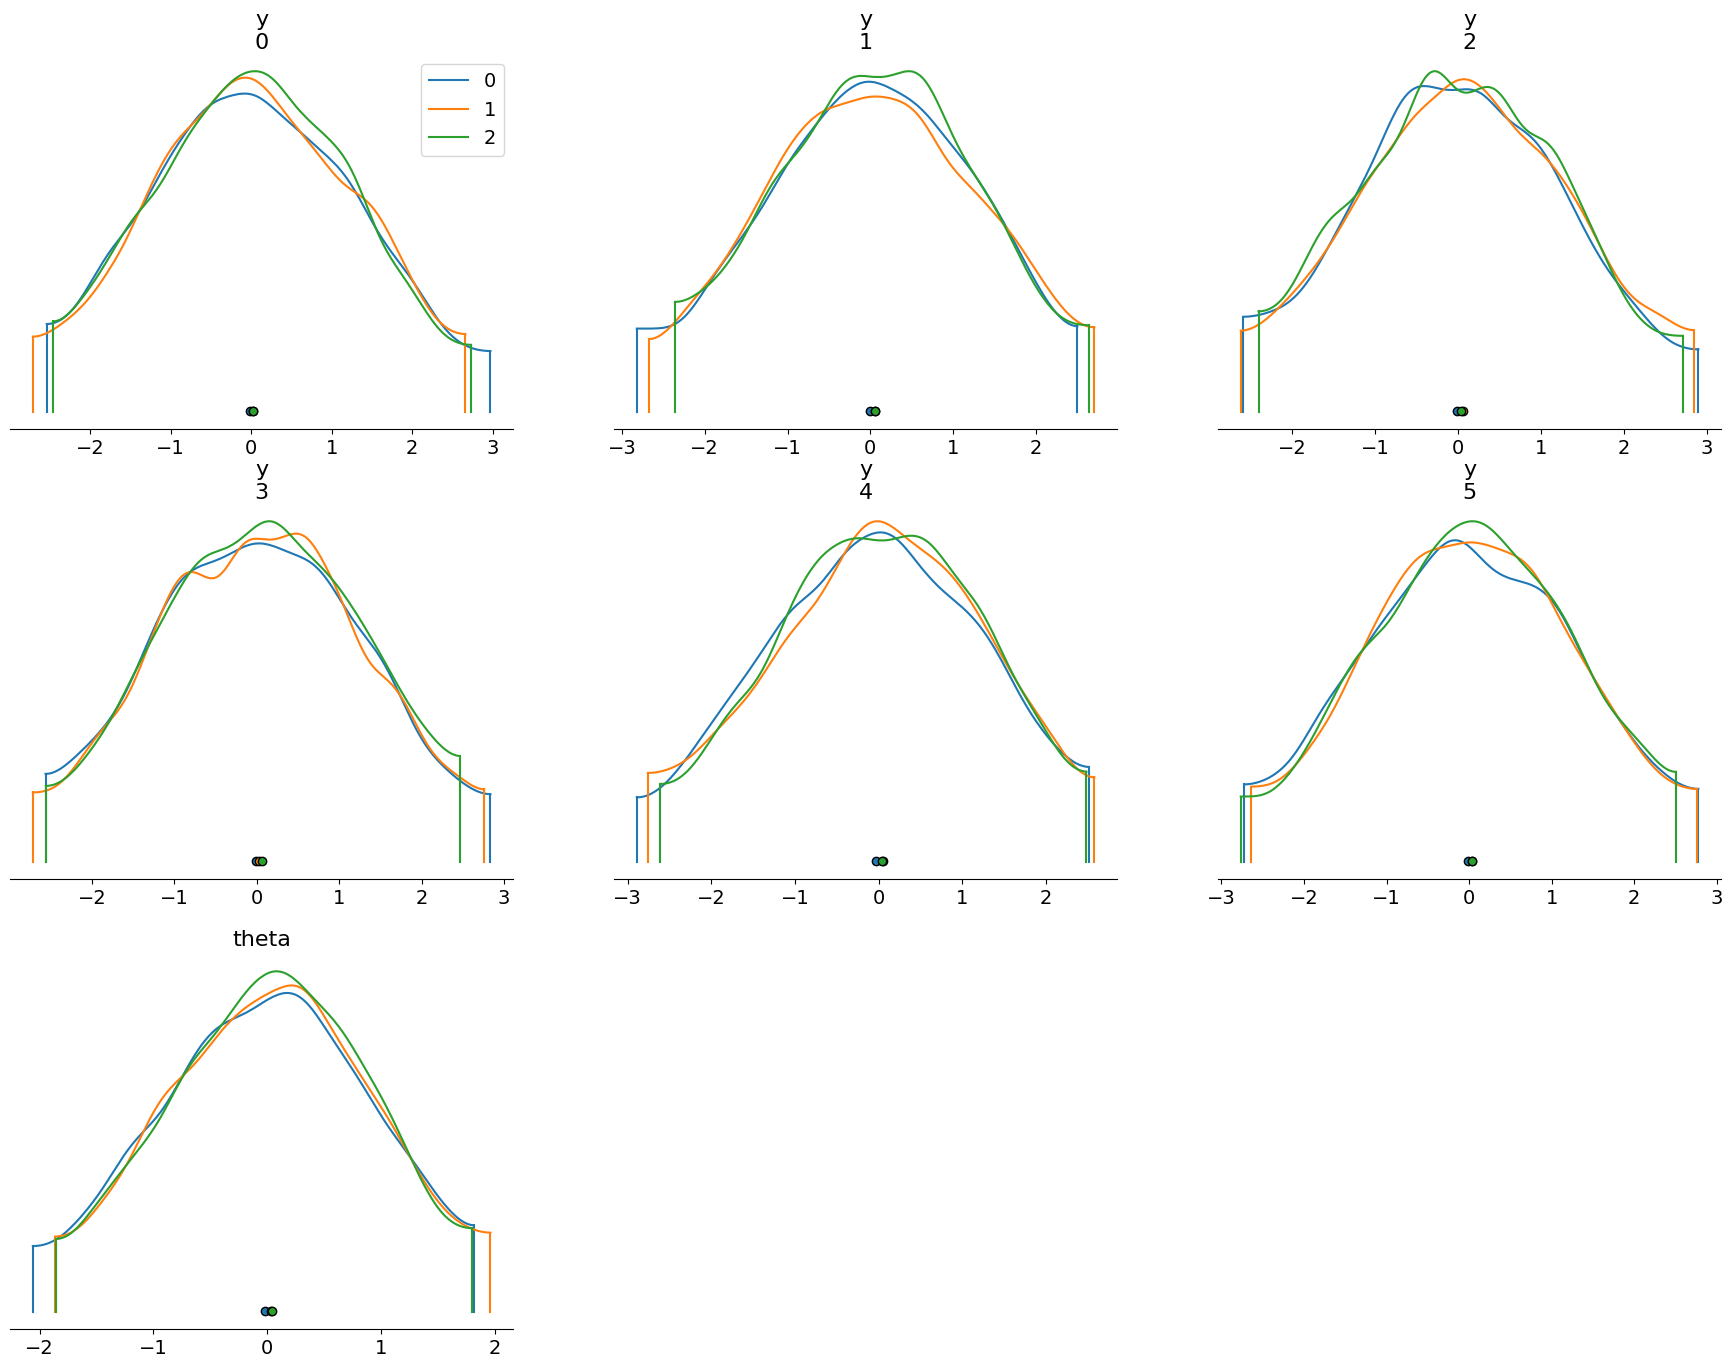

In [36]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [39]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable

16:07:56 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
16:07:56 - cmdstanpy - INFO - Chain [1] start processing
16:07:56 - cmdstanpy - INFO - Chain [2] start processing
16:07:56 - cmdstanpy - INFO - Chain [3] start processing
16:07:56 - cmdstanpy - INFO - Chain [4] start processing
16:07:56 - cmdstanpy - INFO - Chain [3] done processing
16:07:56 - cmdstanpy - INFO - Chain [1] done processing
16:07:56 - cmdstanpy - INFO - Chain [4] done processing
16:07:56 - cmdstanpy - INFO - Chain [2] done processing


16:08:00 - cmdstanpy - WARNING - Sample doesn't contain draws from warmup iterations, rerun sampler with "save_warmup=True".


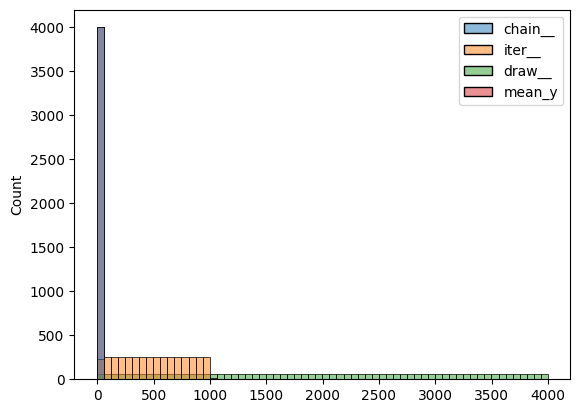

In [40]:
mean_of_y_df = mean_of_y.draws_pd()
sns.histplot(mean_of_y_df)
plt.show()